# [Alaska Berry Futures](https://sites.google.com/alaska.edu/alaska-berry-futures/home)
### Community berry harvest 2013-18

**Author: Lindsey Parkinson**    
**Date: February 8, 2023**

Data processing behind the map of % of berries picked that are a certain berry species, by Alaskan community.     

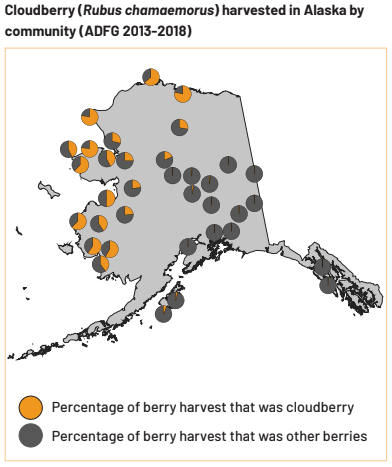    

[Data from ADFG Community Subsistence Information System (CSIS)](https://www.adfg.alaska.gov/sb/CSIS/)    
 > \-> Resources Categories -> Vegetation -> Statewide
>

**Post-processing:** 
1. "Salmonberry" is a common name for both *Rubus spectabilis* and *R. chamaemorus* in Alaska. *R. chamaemorus* is also known as cloudberry. In post processing, any time salmonberry is recorded outside the range of *R. spectabilis*, it was manually reassigned to cloudberry.
2. Latitude and Longitude for each community was added later


In [14]:
import pandas as pd
import os
import numpy as np

working_directory = os.getcwd()

In [15]:
# Vegetation harvest spreadsheets downloaded from ADFG
# 2018 was the most recent survey available at the time of data processing
# Going back to 2013 gave full coverage of the state

veg0 =  pd.read_excel(working_directory + "\\commharv-vegetation-2013.xls")
veg1 =  pd.read_excel(working_directory + "\\commharv-vegetation-2014.xls")
veg2 =  pd.read_excel(working_directory + "\\commharv-vegetation-2015.xls")
veg3 =  pd.read_excel(working_directory + "\\commharv-vegetation-2016.xls")#, encoding='cp1252')
veg4 =  pd.read_excel(working_directory + "\\commharv-vegetation-2017.xls")
veg5 =  pd.read_excel(working_directory + "\\commharv-vegetation-2018.xls")

pd.options.display.max_columns = None
pd.options.display.max_rows = 50


In [17]:
# combine dataframes
veg = pd.concat([veg0, veg1, veg2, veg3, veg4, veg5])

In [18]:
veg.head()

,Project_ID,Project_Name,Study_Year,Community_Code,Community_Name,Resource_Code,Resource_Name,Species_Flag,Percent_Using,Percent_Attempting_to_Harvest,Percent_Harvesting,Percent_Receiving,Percent_Giving,Reported_Pounds_Harvested,Estimated_Total_Pounds_Harvested,Lower_Pounds_Harvested,Upper_Pounds_Harvested,Mean_Pounds_Per_Household,Percapita_Pounds_Harvested,Conversion_Units_To_Pounds,Resource_Harvest_Units,Number_Of_Resource_Harvested,Estimated_Amount_Harvested,Ninety_Five_Percent_CI_OF_Harvest,Lower_Harvested_Amount,Upper_Harvested_Amount,Percent_Of_Total_Harvest,Top_OneHundreth_Percentile_User_Grams_Per_Day,Top_NinetyFifth_Percentile_User_Grams_per_Day,Top_Fiftieth_Percentile_User_Grams_per_Day,Ninety_Five_Percent_CI_Of_Use_Grams_Per_Day,Ninety_Five_Percent_CI_Of_Use_Pounds,Mean_Grams_Per_Capita_Use,Mean_Pounds_Per_Capita_Use,Mean_Grams_Percapita_Harvest,ResCatCD,Memo
0,228,Chuckchi CIAP,2013,110,Deering,600000000,Vegetation,2,0.938,0.813,0.750,0.594,0.531,1385.1,1988.7,1640.6775,2336.72240,45.2,15.552136,NaN,lb.,483.6,1988.7,0.175,1640.6775,2336.72240,0.023,NaN,NaN,NaN,25.026680,20.138756,20.615288,16.588945,19.326832,600000000,NaN
1,228,Chuckchi CIAP,2013,114,Diomede,600000000,Vegetation,2,0.680,0.480,0.480,0.440,0.200,445.1,697.6,445.1000,975.94240,17.9,8.768333,NaN,lb.,143.6,697.6,0.399,445.1000,975.94240,0.029,NaN,NaN,NaN,21.926235,17.643854,16.024288,12.894608,10.896516,600000000,NaN
2,205,Donlin Creek (Phase IV),2013,121,Eek,600000000,Vegetation,2,0.969,0.875,0.859,0.484,0.438,4934.8,7051.7,7041.6714,7061.80600,78.4,20.301903,NaN,lb.,164406.3,7051.7,0.128,2348.2556,2355.92200,0.083,NaN,NaN,NaN,29.863144,24.030617,26.043276,20.956802,25.229424,600000000,NaN
3,218,Susitna-Watana Hydro (Copper Basin),2013,145,Glennallen,600000000,Vegetation,2,0.870,0.818,0.818,0.428,0.454,1247.5,2288.8,1821.8849,2755.71530,16.3,5.966298,NaN,lb.,726.0,2288.8,0.204,1821.8849,2755.71530,0.061,74.873420,27.339672,3.961146,10.260834,8.256808,8.522287,6.857814,7.414392,600000000,NaN
4,218,Susitna-Watana Hydro (Copper Basin),2013,149,Gulkana,600000000,Vegetation,2,0.896,0.793,0.793,0.517,0.517,361.7,418.8,361.7000,500.46597,12.6,4.045231,NaN,lb.,180.1,418.8,0.195,361.7000,500.46597,0.028,31.378487,9.941699,4.970849,6.704614,5.395146,5.610556,4.514767,5.027059,600000000,NaN


In [8]:
# Subset vegetation dataframe to relevant columns
veg= veg.groupby(['Community_Name','Resource_Name'])[['Reported_Pounds_Harvested','Estimated_Total_Pounds_Harvested','Mean_Pounds_Per_Household','Percapita_Pounds_Harvested']].sum().reset_index()


In [9]:
# Small fleshy fruits (aka berries) included in ADFG survey

berries=[
    'Berries', # total amount of berries harvested
    'Bearberry',
    'Blueberry',
    'Cloud Berry',
    'Crowberry',
    'Currants',
    'Elderberry',
    'Gooseberry',
    'High Bush Cranberry',
    'Huckleberry',
    'Low Bush Cranberry',
    'Nagoonberry',
    'Other Wild Berry',
    'Respberry',
    'Salmonberry',
    'Soapberry',
    'Strawberry',
    'Thimbleberry',
    'Twisted Stalk Berry (Watermelon Berry)',
    'Wild Rose Hips'
]

In [9]:
# Berry harvest overview across Alaska 2013-2018
# this dataframe is not saved to a variable
veg[veg['Resource_Name'].isin(berries)].groupby(['Resource_Name'])['Reported_Pounds_Harvested','Estimated_Total_Pounds_Harvested','Mean_Pounds_Per_Household','Percapita_Pounds_Harvested'].sum()[:50]

<ipython-input-9-fe606259141c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  veg[veg['Resource_Name'].isin(berries)].groupby(['Resource_Name'])['Reported_Pounds_Harvested','Estimated_Total_Pounds_Harvested','Mean_Pounds_Per_Household','Percapita_Pounds_Harvested'].sum()[:50]


,Reported_Pounds_Harvested,Estimated_Total_Pounds_Harvested,Mean_Pounds_Per_Household,Percapita_Pounds_Harvested
Resource_Name,,,,
Bearberry,36.5000,53.460563,0.425352,0.197825
Berries,123163.6000,312918.052030,1859.080737,618.266700
Blueberry,30432.6500,80012.627986,511.780578,188.731074
Cloud Berry,29397.2250,47347.149228,374.127396,89.014759
Crowberry,20372.0000,32756.771173,292.260396,81.128767
Currants,1447.0750,5561.839876,17.589931,6.777285
Elderberry,374.8000,1741.800000,3.692308,1.415835
Gooseberry,117.0000,438.364356,1.739604,0.606804
High Bush Cranberry,3516.4500,7840.998133,76.455984,33.152275


In [10]:
#Berry harvest data by community for species of interest

Berries = veg[veg['Resource_Name']=='Berries'].groupby(['Community_Name'])[['Reported_Pounds_Harvested','Estimated_Total_Pounds_Harvested','Mean_Pounds_Per_Household','Percapita_Pounds_Harvested']].sum().reset_index()

Blueberry = veg[veg['Resource_Name']=='Blueberry'].groupby(['Community_Name'])[['Reported_Pounds_Harvested','Estimated_Total_Pounds_Harvested','Mean_Pounds_Per_Household','Percapita_Pounds_Harvested']].sum().reset_index()

Cloudberry =veg[veg['Resource_Name']=='Cloud Berry'].groupby(['Community_Name'])[['Reported_Pounds_Harvested','Estimated_Total_Pounds_Harvested','Mean_Pounds_Per_Household','Percapita_Pounds_Harvested']].sum().reset_index()
 
Lingonberry = veg[veg['Resource_Name']=='Low Bush Cranberry'].groupby(['Community_Name'])[['Reported_Pounds_Harvested','Estimated_Total_Pounds_Harvested','Mean_Pounds_Per_Household','Percapita_Pounds_Harvested']].sum().reset_index()

RoseHips = veg[veg['Resource_Name']=='Wild Rose Hips'].groupby(['Community_Name'])[['Reported_Pounds_Harvested','Estimated_Total_Pounds_Harvested','Mean_Pounds_Per_Household','Percapita_Pounds_Harvested']].sum().reset_index()

Salmonberry = veg[veg['Resource_Name']=='Salmonberry'].groupby(['Community_Name'])[['Reported_Pounds_Harvested','Estimated_Total_Pounds_Harvested','Mean_Pounds_Per_Household','Percapita_Pounds_Harvested']].sum().reset_index()

Crowberry = veg[veg['Resource_Name']=='Crowberry'].groupby(['Community_Name'])[['Reported_Pounds_Harvested','Estimated_Total_Pounds_Harvested','Mean_Pounds_Per_Household','Percapita_Pounds_Harvested']].sum().reset_index()

Currants = veg[veg['Resource_Name']=='Currants'].groupby(['Community_Name'])[['Reported_Pounds_Harvested','Estimated_Total_Pounds_Harvested','Mean_Pounds_Per_Household','Percapita_Pounds_Harvested']].sum().reset_index()



In [11]:
BerryMapData = pd.DataFrame(Berries['Community_Name'])

In [12]:
BerryMapData.head()

,Community_Name
0,Akhiok
1,Anaktuvuk Pass
2,Anderson
3,Birch Creek
4,Buckland


In [13]:
# Add 'Percapita_Pounds_Harvested' column from each berry species, rename column to relevant species

BerryMapData = pd.merge(BerryMapData, Cloudberry[['Community_Name','Percapita_Pounds_Harvested']],
                        on= 'Community_Name',how='left')
BerryMapData = BerryMapData.rename(columns={'Percapita_Pounds_Harvested':'RUBCHA_PerCapita'})


BerryMapData = pd.merge(BerryMapData, RoseHips[['Community_Name','Percapita_Pounds_Harvested']],
                        on= 'Community_Name',how='left')
BerryMapData = BerryMapData.rename(columns={'Percapita_Pounds_Harvested':'ROSACI_PerCapita'})


BerryMapData = pd.merge(BerryMapData, Salmonberry[['Community_Name','Percapita_Pounds_Harvested']],
                        on= 'Community_Name',how='left')
BerryMapData = BerryMapData.rename(columns={'Percapita_Pounds_Harvested':'RUBSPE_PerCapita'})


BerryMapData = pd.merge(BerryMapData, Crowberry[['Community_Name','Percapita_Pounds_Harvested']],
                        on= 'Community_Name',how='left')
BerryMapData = BerryMapData.rename(columns={'Percapita_Pounds_Harvested':'CROW_PerCapita'})


BerryMapData = pd.merge(BerryMapData, Currants[['Community_Name','Percapita_Pounds_Harvested']],
                        on= 'Community_Name',how='left')
BerryMapData = BerryMapData.rename(columns={'Percapita_Pounds_Harvested':'CURRANT_PerCapita'})


In [14]:
BerryMapData.head()

,Community_Name,RUBCHA_PerCapita,ROSACI_PerCapita,RUBSPE_PerCapita,CROW_PerCapita,CURRANT_PerCapita
0,Akhiok,0.552632,0.526316,7.947374,0.526316,NaN
1,Anaktuvuk Pass,NaN,NaN,1.097059,0.742647,NaN
2,Anderson,NaN,0.254237,NaN,0.036017,0.050847
3,Birch Creek,0.000000,0.000000,NaN,0.000000,NaN
4,Buckland,3.175545,NaN,NaN,2.644068,NaN


In [15]:
# calculate pecent of berry harvest by species per community. The key number used in the map 

BerryMapData['Berries_Percapita_Pounds_Harvested'] = Berries['Percapita_Pounds_Harvested'].copy()
BerryMapData['VACULI_Percent_of_Harvested'] = Blueberry['Percapita_Pounds_Harvested'].astype(float) / BerryMapData['Berries_Percapita_Pounds_Harvested'].astype(float) * 100
BerryMapData['VACVIT_Percent_of_Harvested'] = Lingonberry['Percapita_Pounds_Harvested'].astype(float) / BerryMapData['Berries_Percapita_Pounds_Harvested'].astype(float)* 100
BerryMapData['RUBCHA_Percent_of_Harvested'] = BerryMapData['RUBCHA_PerCapita'].astype(float,errors = 'ignore') / BerryMapData['Berries_Percapita_Pounds_Harvested'].astype(float)*100
BerryMapData['ROSACI_Percent_of_Harvested'] = BerryMapData['ROSACI_PerCapita'].astype(float,errors = 'ignore') / BerryMapData['Berries_Percapita_Pounds_Harvested'].astype(float)*100
BerryMapData['RUBSPE_Percent_of_Harvested'] = BerryMapData['RUBSPE_PerCapita'].astype(float,errors = 'ignore') / BerryMapData['Berries_Percapita_Pounds_Harvested'].astype(float)*100
BerryMapData['CROW_Percent_of_Harvested'] = BerryMapData['CROW_PerCapita'].astype(float,errors = 'ignore') / BerryMapData['Berries_Percapita_Pounds_Harvested'].astype(float)*100
BerryMapData['CURRANT_Percent_of_Harvested'] = BerryMapData['CURRANT_PerCapita'].astype(float,errors = 'ignore') / BerryMapData['Berries_Percapita_Pounds_Harvested'].astype(float)*100


In [16]:
# drop per capita, it's not used in the map
BerryMapData = BerryMapData.drop(columns=['RUBCHA_PerCapita','ROSACI_PerCapita','RUBSPE_PerCapita',
                                         'CROW_PerCapita','CURRANT_PerCapita'])

In [19]:
## EXPORT
#BerryMapData.to_excel('AK subsistence.xlsx', index=False)


**NOTE:** "Salmonberry" is a common name for both *Rubus spectabilis* and *R. chamaemorus* in Alaska. *R. chamaemorus* is also known as cloudberry. In post processing, any time salmonberry is recorded outside the range of *R. spectabilis*, it was manually reassigned to cloudberry. 